### **NYU Depth Dataset V2: EDA**

The NYU-Depth V2 data set is comprised of video sequences from a variety of indoor scenes as recorded by both the RGB and Depth cameras from the Microsoft Kinect. This notebook contains exploratory data analysis of the dataset before model training.

##### Loading necessary libraries and dataset

In [5]:
import os
import glob
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set the dataset root for the train data (modify if needed)
DATASET_TRAIN_ROOT = "/projectnb/dl4ds/materials/datasets/monocular-depth-estimation/nyuv2/nyu_data/data/nyu2_train"

# Verify that the train directory exists
if not os.path.isdir(DATASET_TRAIN_ROOT):
    raise FileNotFoundError("The train directory was not found. Please check the dataset path.")

print("Training dataset directory:", DATASET_TRAIN_ROOT)

Training dataset directory: /projectnb/dl4ds/materials/datasets/monocular-depth-estimation/nyuv2/nyu_data/data/nyu2_train


This cell defines a function to traverse the training directory's subfolders, collecting all RGB images (JPG) and depth maps (PNG), and prints out the counts for each category and overall.

In [6]:
def get_rgb_depth_files(train_root):
    rgb_files = []
    depth_files = []
    
    # List all category subfolders (e.g., basement, bedroom, etc.)
    categories = [d for d in os.listdir(train_root) if os.path.isdir(os.path.join(train_root, d))]
    print("Found categories:", categories)
    
    # Iterate through each category and gather image file paths.
    for cat in categories:
        cat_path = os.path.join(train_root, cat)
        # List all JPG files for RGB images.
        rgb_files_cat = sorted(glob.glob(os.path.join(cat_path, "*.jpg")))
        # List all PNG files for depth maps.
        depth_files_cat = sorted(glob.glob(os.path.join(cat_path, "*.png")))
        
        # Optionally, print a summary for this category.
        print(f"Category '{cat}': {len(rgb_files_cat)} RGB images, {len(depth_files_cat)} depth maps")
        
        rgb_files.extend(rgb_files_cat)
        depth_files.extend(depth_files_cat)
    
    # Final report on the entire training set.
    print(f"\nTotal in training set: {len(rgb_files)} RGB images and {len(depth_files)} depth maps.")
    if len(rgb_files) != len(depth_files):
        print("Warning: The total number of RGB images and depth maps do not match!")
    
    return rgb_files, depth_files

# Get file lists for RGB and depth images using the updated function.
rgb_files, depth_files = get_rgb_depth_files(DATASET_TRAIN_ROOT)

Found categories: ['bookstore_0001e_out', 'bedroom_0113_out', 'bedroom_0057_out', 'classroom_0022_out', 'classroom_0016_out', 'furniture_store_0002d_out', 'bedroom_0065_out', 'bedroom_0014_out', 'dining_room_0037_out', 'laundry_room_0001_out', 'kitchen_0017_out', 'bedroom_0025_out', 'bedroom_0045_out', 'classroom_0011_out', 'bedroom_0078_out', 'kitchen_0048_out', 'study_0006_out', 'living_room_0004_out', 'office_0011_out', 'bathroom_0035_out', 'living_room_0078_out', 'kitchen_0019a_out', 'living_room_0018_out', 'bathroom_0042_out', 'basement_0001b_out', 'bedroom_0035_out', 'office_0026_out', 'living_room_0005_out', 'bathroom_0006_out', 'bedroom_0086_out', 'living_room_0047b_out', 'bedroom_0051_out', 'bedroom_0125a_out', 'bedroom_0069_out', 'bedroom_0132_out', 'bedroom_0016_out', 'study_0008_out', 'bedroom_0053_out', 'kitchen_0029a_out', 'bathroom_0050_out', 'dining_room_0031_out', 'kitchen_0029b_out', 'office_0025_out', 'bedroom_0041_out', 'furniture_store_0001c_out', 'bathroom_0010_ou

#### Visualizing Sample RGB-Depth Pairs

This cell defines a function to randomly select and display RGB images alongside their corresponding depth maps. It converts images for proper visualization and plots them side by side for easy inspection.

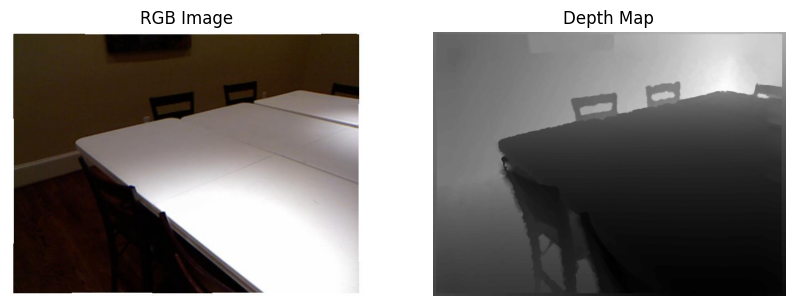

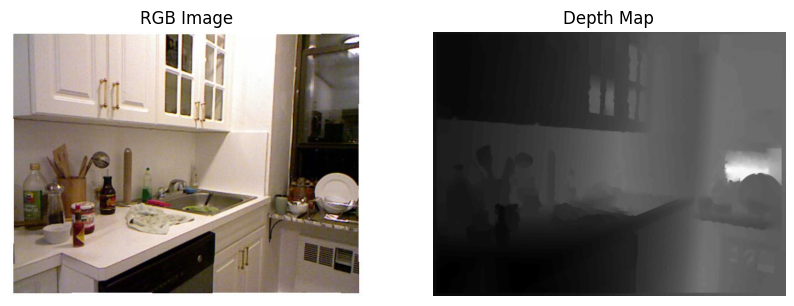

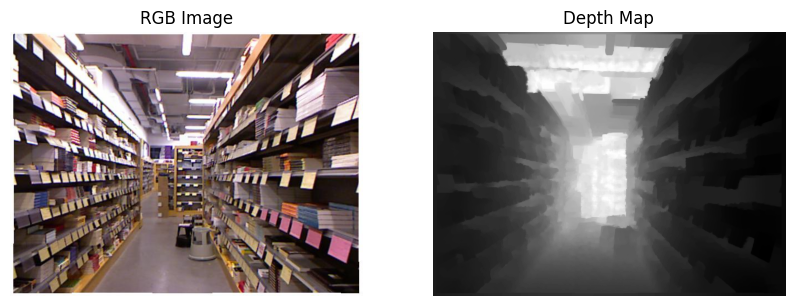

In [ ]:
def visualize_samples(rgb_files, depth_files, num_samples=3):
    # Ensure that we have pairs to sample from.
    sample_count = min(len(rgb_files), len(depth_files))
    sample_indices = random.sample(range(sample_count), num_samples)
    
    for idx in sample_indices:
        # Load the RGB image and convert color space for display.
        rgb_img = cv2.imread(rgb_files[idx], cv2.IMREAD_COLOR)
        rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
        
        # Load the corresponding depth image as grayscale.
        depth_img = cv2.imread(depth_files[idx], cv2.IMREAD_GRAYSCALE)
        
        # Display the images side by side.
        plt.figure(figsize=(10, 4))
        
        plt.subplot(1, 2, 1)
        plt.imshow(rgb_img)
        plt.title("RGB Image")
        plt.axis("off")
        
        plt.subplot(1, 2, 2)
        plt.imshow(depth_img)
        plt.title("Depth Map")
        plt.axis("off")
        
        plt.show()

# Visualize 3 random RGB-depth pairs from the training set.
visualize_samples(rgb_files, depth_files, num_samples=3)

#### Analyzing Depth Distribution

This cell computes key statistics (min, max, mean, median, standard deviation) from a sample of depth maps. It aggregates pixel values from 50 depth images and plots a histogram to visualize the overall distribution.

Depth Statistics from Sample:
Min: 25
Max: 254
Mean: 73.54
Median: 47.00
Standard Deviation: 52.83


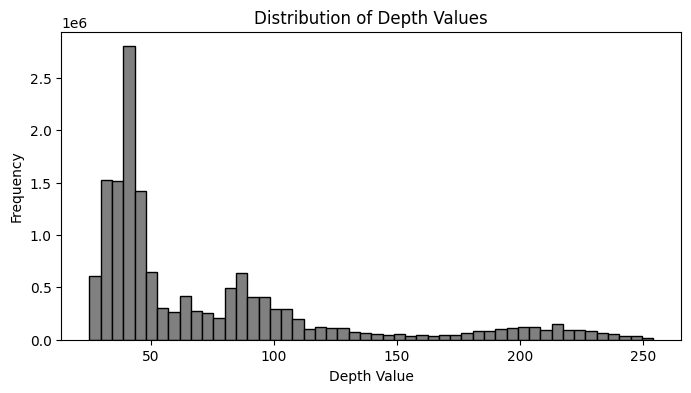

In [6]:
def analyze_depth_distribution(depth_files, sample_count=50):
    all_depth_values = []
    sample_for_analysis = min(sample_count, len(depth_files))
    
    for i in range(sample_for_analysis):
        depth_img = cv2.imread(depth_files[i], cv2.IMREAD_UNCHANGED)
        if depth_img is not None:
            # Flatten the depth image to 1D array.
            depth_values = depth_img.flatten()
            # Optionally, filter out zero values if they represent missing data:
            # depth_values = depth_values[depth_values > 0]
            all_depth_values.extend(depth_values.tolist())
    
    all_depth_values = np.array(all_depth_values)
    
    # Print and display summary statistics.
    print("Depth Statistics from Sample:")
    print(f"Min: {np.min(all_depth_values)}")
    print(f"Max: {np.max(all_depth_values)}")
    print(f"Mean: {np.mean(all_depth_values):.2f}")
    print(f"Median: {np.median(all_depth_values):.2f}")
    print(f"Standard Deviation: {np.std(all_depth_values):.2f}")
    
    # Plot histogram of depth values.
    plt.figure(figsize=(8, 4))
    plt.hist(all_depth_values, bins=50, color='gray', edgecolor='black')
    plt.title("Distribution of Depth Values")
    plt.xlabel("Depth Value")
    plt.ylabel("Frequency")
    plt.show()

# Analyze depth distribution using 50 samples.
analyze_depth_distribution(depth_files, sample_count=50)

#### Detecting Depth Outliers

This cell computes the mean depth for each image and identifies outliers that deviate by more than 3 standard deviations from the overall mean. It prints the number of detected outliers, helping flag potentially problematic depth maps.

In [14]:
def detect_depth_outliers(depth_files, threshold=3):
    depth_means = []
    
    for f in depth_files:
        depth_img = cv2.imread(f, cv2.IMREAD_UNCHANGED)
        if depth_img is not None:
            depth_means.append(np.mean(depth_img))
    depth_means = np.array(depth_means)
    
    overall_mean = np.mean(depth_means)
    overall_std = np.std(depth_means)
    
    outlier_indices = np.where(np.abs(depth_means - overall_mean) > threshold * overall_std)[0]
    print(f"Found {len(outlier_indices)} outliers out of {len(depth_files)} images.")
    return outlier_indices, depth_means

outliers, means = detect_depth_outliers(depth_files)

Found 92 outliers out of 50688 images.
